## Data Collection & Initial Characterisation

### Data Preprocessing and Cleaning 

Before running this project you must have XGBoost installed, this is required for the classification section of this project and is needed to import the project libraries without errors. 

This can be completed by opening Annaconda command prompt and entering the command,   pip install xgboost

It will take thirty seconds or less to install. 

In [1]:
#Import all libraries used for the project. You must download xgboost in advance in order to use the classification algorithm
#To download XGBOOST, open up Annaconda command prompt and entering the command pip install xgboost.
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import os
import sys
import bs4
from bs4 import BeautifulSoup
import requests
import urllib.request
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

Begin with importing all libraries needed for this project. For my classification algorithm, I used XGBClassifier, this should be downloaded before running this project. You can do this by accessing anaconda and entering in the command pip install xgboost.

In [2]:
link = "http://mlg.ucd.ie/modules/COMP30760/assign2/17328666.html"
response = urllib.request.urlopen(link)
html = response.read().decode()

I read and then decoded the html's information using the link provided to use for this project. My student number 17328666 was inserted at the end of this link as instructed.

In [3]:
#Print out the html information. 
lines = html.strip().split("\n")
for l in lines:
 print(l)

<!DOCTYPE html>
<html lang="en">
<head>
  <meta name="robots" content="noindex">  
  <meta name="description" content="Content on this site is posted for teaching purposes only. This dataset is for '17328666'.">
  <meta charset="utf-8">
  <meta http-equiv="X-UA-Compatible" content="IE=edge">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>House Sale Register</title>
  <link rel="stylesheet"  target="_blank" href="http://maxcdn.bootstrapcdn.com/bootstrap/3.3.5/css/bootstrap.min.css">
  <script src="https://ajax.googleapis.com/ajax/libs/jquery/1.11.3/jquery.min.js"></script>
  <script src="http://maxcdn.bootstrapcdn.com/bootstrap/3.3.5/js/bootstrap.min.js"></script>
  <style>
    .jumbotron
    {

    }
    .jumbotron .h1, .jumbotron h1 
    {
      font-size: 45px;
      margin-top: 0;
      margin-bottom: 0;
    }
    h2
    {
      margin: 1em 0 1em 0;  
    }
    li
    {
      font-size: 100%;
    }
    div.instructions
    {
      border: 2px solid l

I then printed out the html's information. The dataset has 5 different categories, 'Date of Sales', 'Prices', 'Location', 'Year Built', 'Sizes' and 'Description'. The relevant data can be accessed by parsing through the 'td' section of the information. 

In [4]:
#From the html parse through all information from the td category and print it out. 
parser = bs4.BeautifulSoup(html,"html.parser")
for match in parser.find_all("td"):
 text = match.get_text()
 print(text)

03 Jan 2016
€638,740.00
Brookville
2011
1,849 sq ft
Type: Detached; Style: 2-Story; 3 Bedrooms; 2 Bathrooms
07 Jan 2016
€546,330.00
Brookville
2009
1,551 sq ft
Type: Detached; Style: 1-Story; 3 Bedrooms; 2 Bathrooms
10 Jan 2016
€376,039.00
West End
1963
1,073 sq ft
Type: Terraced; Style: 1-Story; 3 Bedrooms; 1 Bathroom
10 Jan 2016
€511,164.00
West End
2007
1,628 sq ft
Type: Detached; Style: 2-Story; 3 Bedrooms; 2 Bathrooms
10 Jan 2016
€453,222.00
West End
2013
1,388 sq ft
Type: Detached; Style: 2-Story; 3 Bedrooms; 2 Bathrooms
12 Jan 2016
€453,108.00
West End
2008
1,653 sq ft
Type: Detached; Style: 2-Story; 3 Bedrooms; 2 Bathrooms
16 Jan 2016
€352,303.00
Oakbrook
1969
1,060 sq ft
Type: Detached; Style: 1-Story; 3 Bedrooms; 1 Bathroom
16 Jan 2016
€411,323.00
Oakbrook
1974
1,407 sq ft
Type: Detached; Style: 2-Story; 4 Bedrooms; 1 Bathroom
20 Jan 2016
€705,562.00
Brookville
2013
1,756 sqft
Type: Detached; Style: 1-Story; 3 Bedrooms; 2 Bathrooms
08 Feb 2016
€510,069.00
Brookville
2010
1,77

1,348 sqft
Type: Detached; Style: 1-Story; 3 Bedrooms; 2 Bathrooms
27 Mar 2017
€491,865.00
East End
2017
1,244 sqft
Type: Detached; Style: 1-Story; 3 Bedrooms; 2 Bathrooms
27 Mar, 2017
€660,538.00
East End
1951
2,185 sqft
Type: Detached; Style: 2-Story; 4 Bedrooms; 2 Bathrooms
30 Mar 2017
€371,016.00
Oakbrook
1979
967 sq ft
Type: Detached; Style: 1-Story; 3 Bedrooms; 1 Bathroom
01 Apr, 2017
€475,728.00
Oakbrook
1972
1,131 sq ft
Type: Detached; Style: 1.5-Story; 3 Bedrooms; 1 Bathroom
02 Apr 2017
€260,543.00
Rivermont
1964
904 sq ft
Type: Bunaglow; Style: 1-Story; 1 Bedroom; 1 Bathroom
04 Apr 2017
€323,086.00
Brookville
2002
982 sqft
Type: Detached; Style: 1-Story; 3 Bedrooms; 1 Bathroom
04 Apr 2017
€389,771.00
Oakbrook
1979
1,085 sq ft
Type: Detached; Style: 1-Story; 3 Bedrooms; 1 Bathroom
05 Apr 2017
€394,407.00
Oakbrook
1968
950 sq ft
Type: Detached; Style: 1-Story; 2 Bedrooms; 1 Bathroom
05 Apr 2017
€432,961.00
Oakbrook
1967
1,718 sq ft
Type: Detached; Style: 1-Story; 4 Bedrooms; 1 

Brookville
2010
1,494 sq ft
Type: Detached; Style: 1-Story; 3 Bedrooms; 2 Bathrooms
02 Oct 2017
€728,935.00
Oakbrook
1978
2,195 sq ft
Type: Detached; Style: 1-Story; 4 Bedrooms; 2 Bathrooms
05 Oct 2017
€303,799.00
East End
1962
965 sq ft
Type: Detached; Style: 1-Story; 3 Bedrooms; 1 Bathroom
07 Oct, 2017
€873,699.00
Beacon Hill
2012
2,469 sq ft
4 Bedrooms; Style: 2-Story; Type: Detached; 2 Bathrooms
07 Oct 2017
€645,211.00
Beacon Hill
2007
1,588 sq ft
Type: Detached; Style: 1-Story; 3 Bedrooms; 2 Bathrooms
13 Oct 2017
€395,698.00
Rivermont
1934
1,605 sq ft
Style: 1-Story; 2 Bathrooms; 3 Bedrooms; Type: Detached
24 Oct 2017
€488,294.00
Brookville
2011
1,337 sqft
Type: Detached; Style: 1-Story; 3 Bedrooms; 2 Bathrooms
28 Oct 2017
€538,704.00
Beacon Hill
2014
1,388 sqft
Type: Semi-Detached; 2 Bedrooms; 2 Bathrooms; Style: 1-Story
28 Oct 2017
€585,300.00
Beacon Hill
2012
1,509 sq ft
Type: Detached; Style: 1-Story; 3 Bedrooms; 2 Bathrooms
28 Oct 2017
€412,122.00
Oakbrook
1972
1,294 sq ft
2 

Rivermont
1928
2,812 sq ft
Type: Detached; Style: 1-Story; 5 Bedrooms; 2 Bathrooms
16 Jun 2018
€419,309.00
Rivermont
1915
1,853 sqft
2 Bathrooms; Type: Terraced; 3 Bedrooms; Style: 1-Story
17 Jun 2018
€482,611.00
Brookville
2011
1,632 sq ft
Style: 2-Story; 2 Bathrooms; Type: Detached; 3 Bedrooms
18 Jun 2018
€467,161.00
Avoca
2008
1,608 sq ft
Type: End-of-Terrace; Style: 2-Story; 3 Bedrooms; 2 Bathrooms
18 Jun 2018
€728,224.00
Avoca
2008
2,138 sq ft
Type: Detached; Style: 2-Story; 4 Bedrooms; 2 Bathrooms
18 Jun 2018
€684,778.00
Avoca
2008
1,580 sq ft
Type: Detached; Style: 1-Story; 3 Bedrooms; 2 Bathrooms
18 Jun 2018
€531,501.00
Rivermont
2011
2,094 sq ft
3 Bedrooms; Style: 1-Story; Type: Detached; 2 Bathrooms
20 Jun 2018
€410,759.00
Rivermont
1912
1,573 sq ft
Type: Detached; Style: 2-Story; 3 Bedrooms; 2 Bathrooms
21 Jun 2018
€383,898.00
East End
2013
1,085 sq ft
Type: Semi-Detached; Style: 1.5-Story; 2 Bedrooms; 1 Bathroom
22 Jun 2018
€632,258.00
Brookville
2008
1,897 sq ft
Type: Deta

31 Oct 2018
€500,249.00
Brookville
2013
1,440 sq ft
Type: Detached; Style: 2-Story; 3 Bedrooms; 2 Bathrooms
01 Nov, 2018
€338,052.00
Rivermont
1962
1,789 sq ft
Type: Detached; Style: 1-Story; 4 Bedrooms; 2 Bathrooms
01 Nov 2018
€302,939.00
Rivermont
1924
1,145 sq ft
Type: Detached; Style: 1-Story; 2 Bedrooms; 1 Bathroom
11 Nov 2018
€389,868.00
Brookville
1985
1,016 sqft
Type: Detached; 2 Bathrooms; 3 Bedrooms; Style: 1.5-Story
11 Nov 2018
€490,359.00
Brookville
2014
1,765 sq ft
Type: Detached; Style: 2-Story; 3 Bedrooms; 2 Bathrooms
11 Nov 2018
€695,982.00
Brookville
2007
1,796 sq ft
Type: Detached; Style: 1-Story; 3 Bedrooms; 2 Bathrooms
11 Nov 2018
€614,518.00
Brookville
2002
1,974 sq ft
Type: Detached; Style: 2-Story; 3 Bedrooms; 2 Bathrooms
13 Nov 2018
€426,685.00
Oakbrook
1966
1,245 sqft
Type: Detached; Style: 1-Story; 3 Bedrooms; 1 Bathroom
16 Nov 2018
€653,130.00
Oakbrook
1968
2,066 sq ft
Type: Detached; Style: 1-Story; 4 Bedrooms; 2 Bathrooms
17 Nov 2018
€368,624.00
Oakbrook
19

880 sq ft
Type: Bunaglow; Style: 1-Story; 3 Bedrooms; 1 Bathroom
06 Jul, 2019
€517,461.00
Brookville
2010
1,642 sq ft
Type: Detached; Style: 2-Story; 3 Bedrooms; 2 Bathrooms
08 Jul 2019
€927,165.00
Beacon Hill
2016
2,167 sq ft
Type: Detached; Style: 2-Story; 3 Bedrooms; 2 Bathrooms
08 Jul 2019
€716,361.00
Beacon Hill
2003
1,597 sq ft
1 Bathroom; Type: Semi-Detached; Style: 1-Story; 1 Bedroom
08 Jul 2019
€792,021.00
Beacon Hill
2014
1,738 sq ft
Type: Detached; Style: 1-Story; 3 Bedrooms; 2 Bathrooms
09 Jul 2019
€498,818.00
West End
2012
1,425 sqft
Type: Detached; Style: 2-Story; 3 Bedrooms; 2 Bathrooms
09 Jul 2019
€489,902.00
West End
2013
1,505 sq ft
Type: Detached; Style: 2-Story; 3 Bedrooms; 2 Bathrooms
09 Jul 2019
€516,802.00
West End
2007
1,455 sq ft
2 Bathrooms; Style: 2-Story; 3 Bedrooms; Type: Detached
11 Jul 2019
€617,693.00
Beacon Hill
2015
1,294 sq ft
Type: End-of-Terrace; Style: 1-Story; 2 Bedrooms; 2 Bathrooms
11 Jul 2019
€507,576.00
Beacon Hill
2010
1,320 sq ft
Type: Semi-

After parsing through the html dataset using BeautifulSoup, I have constructed a representation of the dataset. From here I will save the Dataset as a csv file named 'Housing' for data pre-processing and cleaning.

In [5]:
# Read the html and then write its data into the csv file
html = 'http://mlg.ucd.ie/modules/COMP30760/assign2/17328666.html'
csv = 'Housing.csv'

tables = pd.read_html(html)
tables[0].to_csv(csv)
csv = 'Housing.csv'

Housing = pd.read_csv('Housing.csv')
Housing.head()

,Unnamed: 0,Date of Sale,Price,Location,Year Built,Size,Description
0,0,03 Jan 2016,"€638,740.00",Brookville,2011,"1,849 sq ft",Type: Detached; Style: 2-Story; 3 Bedrooms; 2 ...
1,1,07 Jan 2016,"€546,330.00",Brookville,2009,"1,551 sq ft",Type: Detached; Style: 1-Story; 3 Bedrooms; 2 ...
2,2,10 Jan 2016,"€376,039.00",West End,1963,"1,073 sq ft",Type: Terraced; Style: 1-Story; 3 Bedrooms; 1 ...
3,3,10 Jan 2016,"€511,164.00",West End,2007,"1,628 sq ft",Type: Detached; Style: 2-Story; 3 Bedrooms; 2 ...
4,4,10 Jan 2016,"€453,222.00",West End,2013,"1,388 sq ft",Type: Detached; Style: 2-Story; 3 Bedrooms; 2 ...


#### a) Construct a Data Frame representation of the data, including all of the descriptive features which represent house sales.


In [6]:
df = pd.read_csv('Housing.csv')
df.head()

,Unnamed: 0,Date of Sale,Price,Location,Year Built,Size,Description
0,0,03 Jan 2016,"€638,740.00",Brookville,2011,"1,849 sq ft",Type: Detached; Style: 2-Story; 3 Bedrooms; 2 ...
1,1,07 Jan 2016,"€546,330.00",Brookville,2009,"1,551 sq ft",Type: Detached; Style: 1-Story; 3 Bedrooms; 2 ...
2,2,10 Jan 2016,"€376,039.00",West End,1963,"1,073 sq ft",Type: Terraced; Style: 1-Story; 3 Bedrooms; 1 ...
3,3,10 Jan 2016,"€511,164.00",West End,2007,"1,628 sq ft",Type: Detached; Style: 2-Story; 3 Bedrooms; 2 ...
4,4,10 Jan 2016,"€453,222.00",West End,2013,"1,388 sq ft",Type: Detached; Style: 2-Story; 3 Bedrooms; 2 ...


Display the Datasets headers

#### b) When constructing the Data Frame, apply any necessary data preprocessing and cleaning steps.


In [7]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date of Sale  941 non-null    object
 1   Price         941 non-null    object
 2   Location      941 non-null    object
 3   Year Built    941 non-null    int64 
 4   Size          941 non-null    object
 5   Description   941 non-null    object
dtypes: int64(1), object(5)
memory usage: 44.2+ KB


The text in the datasets description, that provides information about 4 attributes (Type, Style, Bathroom, and Bedroom) is not in a sequence. Explode will be used to split the text in the description column. This will quadruple the rows.

In [8]:
df = df.assign(Description=df['Description'].str.split(';')).explode('Description')
df.shape

(3764, 6)

A list is made, and target value is stored in relevant list from the description column. Whereas null values are stored in non-relevant target values from the description column. After storing all relevant target values, these null values would be filled by the forward known value.

In [9]:
Type = []
for row in df['Description']:
    if 'Type: ' in row:
        Type.append(row)
    else:
        Type.append(np.nan)
        
df['Type'] = Type

In [10]:
Style = []
for row in df['Description']:
    if 'Style' in row:
        Style.append(row)
    else:
        Style.append(np.nan)
        
df['Style'] = Style

In [11]:
Bedroom = []
for row in df['Description']:
    if 'Bedroom' in row:
        Bedroom.append(row)
    else:
        Bedroom.append(np.nan)
        
df['Bedroom'] = Bedroom

In [12]:
Bathroom = []
for row in df['Description']:
    if 'Bathroom' in row:
        Bathroom.append(row)
    else:
        Bathroom.append(np.nan)
        
df['Bathroom'] = Bathroom

In [13]:
df.fillna(method='ffill', inplace=True)
df = df.reset_index()
df.head()

,index,Date of Sale,Price,Location,Year Built,Size,Description,Type,Style,Bedroom,Bathroom
0,0,03 Jan 2016,"€638,740.00",Brookville,2011,"1,849 sq ft",Type: Detached,Type: Detached,NaN,NaN,NaN
1,0,03 Jan 2016,"€638,740.00",Brookville,2011,"1,849 sq ft",Style: 2-Story,Type: Detached,Style: 2-Story,NaN,NaN
2,0,03 Jan 2016,"€638,740.00",Brookville,2011,"1,849 sq ft",3 Bedrooms,Type: Detached,Style: 2-Story,3 Bedrooms,NaN
3,0,03 Jan 2016,"€638,740.00",Brookville,2011,"1,849 sq ft",2 Bathrooms,Type: Detached,Style: 2-Story,3 Bedrooms,2 Bathrooms
4,1,07 Jan 2016,"€546,330.00",Brookville,2009,"1,551 sq ft",Type: Detached,Type: Detached,Style: 2-Story,3 Bedrooms,2 Bathrooms


As rows are filled by using ffill, relevant rows will start from 3 with a step of 4. Such as 3, 7, 11 and so on. The Data frame will be sliced according to this relevancy.

In [14]:
# slicing rows, should be run once only
df = df[3::4]
df.head()

,index,Date of Sale,Price,Location,Year Built,Size,Description,Type,Style,Bedroom,Bathroom
3,0,03 Jan 2016,"€638,740.00",Brookville,2011,"1,849 sq ft",2 Bathrooms,Type: Detached,Style: 2-Story,3 Bedrooms,2 Bathrooms
7,1,07 Jan 2016,"€546,330.00",Brookville,2009,"1,551 sq ft",2 Bathrooms,Type: Detached,Style: 1-Story,3 Bedrooms,2 Bathrooms
11,2,10 Jan 2016,"€376,039.00",West End,1963,"1,073 sq ft",1 Bathroom,Type: Terraced,Style: 1-Story,3 Bedrooms,1 Bathroom
15,3,10 Jan 2016,"€511,164.00",West End,2007,"1,628 sq ft",2 Bathrooms,Type: Detached,Style: 2-Story,3 Bedrooms,2 Bathrooms
19,4,10 Jan 2016,"€453,222.00",West End,2013,"1,388 sq ft",2 Bathrooms,Type: Detached,Style: 2-Story,3 Bedrooms,2 Bathrooms


The information shown matches the csv file, with no omissions. Now there is no need for the description column anymore, as all information has been derived from it. 

In [15]:
df.drop(["Description"], axis=1, inplace=True)
df.head()

,index,Date of Sale,Price,Location,Year Built,Size,Type,Style,Bedroom,Bathroom
3,0,03 Jan 2016,"€638,740.00",Brookville,2011,"1,849 sq ft",Type: Detached,Style: 2-Story,3 Bedrooms,2 Bathrooms
7,1,07 Jan 2016,"€546,330.00",Brookville,2009,"1,551 sq ft",Type: Detached,Style: 1-Story,3 Bedrooms,2 Bathrooms
11,2,10 Jan 2016,"€376,039.00",West End,1963,"1,073 sq ft",Type: Terraced,Style: 1-Story,3 Bedrooms,1 Bathroom
15,3,10 Jan 2016,"€511,164.00",West End,2007,"1,628 sq ft",Type: Detached,Style: 2-Story,3 Bedrooms,2 Bathrooms
19,4,10 Jan 2016,"€453,222.00",West End,2013,"1,388 sq ft",Type: Detached,Style: 2-Story,3 Bedrooms,2 Bathrooms


The columns are cleaned with respect to the anomalies they have.

In [16]:
df['Price'] = df['Price'].str[1:]
df['Price'] = df['Price'].str.split('.').str[0]
df['Price'] = df['Price'].str.replace(',','')

df['Size'] = df['Size'].str.replace(' sq ft','')
df['Size'] = df['Size'].str.replace(',','')
df['Size'] = df['Size'].str.replace(' sqft','')

df['Type'] = df['Type'].str.replace('Type: ','')

df['Style'] = df['Style'].str.replace('Style: ','')
df['Style'] = df['Style'].str.replace('-Story','')
df['Style'] = df['Style'].str.replace(' ','')

df['Bedroom'] = df['Bedroom'].str.replace(' Bedrooms','')
df['Bedroom'] = df['Bedroom'].str.replace(' Bedroom','')
df['Bedroom'] = df['Bedroom'].str.replace(' ','')

df['Bathroom'] = df['Bathroom'].str.replace(' Bathrooms','')
df['Bathroom'] = df['Bathroom'].str.replace(' Bathroom','')
df['Bathroom'] = df['Bathroom'].str.replace(' ','')

The columns data type is corrected.

In [17]:
df["Date of Sale"] = df["Date of Sale"].apply(pd.to_datetime)
df["Price"]= df["Price"].astype(int)
df["Size"]= df["Size"].astype(int)
df["Style"]= df["Style"].astype(float)
df["Bedroom"]= df["Bedroom"].astype(int)
df["Bathroom"]= df["Bathroom"].astype(int)

In [18]:
df.head()

,index,Date of Sale,Price,Location,Year Built,Size,Type,Style,Bedroom,Bathroom
3,0,2016-01-03,638740,Brookville,2011,1849,Detached,2.0,3,2
7,1,2016-01-07,546330,Brookville,2009,1551,Detached,1.0,3,2
11,2,2016-01-10,376039,West End,1963,1073,Terraced,1.0,3,1
15,3,2016-01-10,511164,West End,2007,1628,Detached,2.0,3,2
19,4,2016-01-10,453222,West End,2013,1388,Detached,2.0,3,2


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 3 to 3763
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         941 non-null    int64         
 1   Date of Sale  941 non-null    datetime64[ns]
 2   Price         941 non-null    int32         
 3   Location      941 non-null    object        
 4   Year Built    941 non-null    int64         
 5   Size          941 non-null    int32         
 6   Type          941 non-null    object        
 7   Style         941 non-null    float64       
 8   Bedroom       941 non-null    int32         
 9   Bathroom      941 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(4), int64(2), object(2)
memory usage: 58.9+ KB


The dataset has now gone through data pre-processing and cleaning. All information within it is now easily accessible and relevant to the project.

#### c) Perform an initial characterisation of the house sale data (e.g. examine the statistics and distributions of the various descriptive features).


The descriptive statistics of the dataframe is as follows:

In [20]:
df.describe()

,index,Price,Year Built,Size,Style,Bedroom,Bathroom
count,941.000000,9.410000e+02,941.000000,941.000000,941.000000,941.000000,941.000000
mean,470.000000,4.644802e+05,1980.468650,1482.246546,1.381509,2.893730,1.598300
std,271.787601,1.903299e+05,32.146876,450.622389,0.470444,0.721533,0.538079
min,0.000000,1.205950e+05,1880.000000,624.000000,1.000000,1.000000,1.000000
25%,235.000000,3.354170e+05,1962.000000,1125.000000,1.000000,2.000000,1.000000
50%,470.000000,4.177560e+05,1980.000000,1460.000000,1.000000,3.000000,2.000000
75%,705.000000,5.531380e+05,2010.000000,1752.000000,2.000000,3.000000,2.000000
max,940.000000,1.599693e+06,2018.000000,3702.000000,2.000000,5.000000,3.000000


In [21]:
df['month']=df['Date of Sale'].dt.month
df['year']=df['Date of Sale'].dt.year

In [22]:
df = df.set_index('Date of Sale')
df.index

DatetimeIndex(['2016-01-03', '2016-01-07', '2016-01-10', '2016-01-10',
               '2016-01-10', '2016-01-12', '2016-01-16', '2016-01-16',
               '2016-01-20', '2016-02-08',
               ...
               '2019-12-13', '2019-12-15', '2019-12-15', '2019-12-26',
               '2019-12-27', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-29', '2019-12-29'],
              dtype='datetime64[ns]', name='Date of Sale', length=941, freq=None)

In [23]:
df.drop(["index"], axis=1, inplace=True)

In [24]:
df.head()

,Price,Location,Year Built,Size,Type,Style,Bedroom,Bathroom,month,year
Date of Sale,,,,,,,,,,
2016-01-03,638740,Brookville,2011,1849,Detached,2.0,3,2,1,2016
2016-01-07,546330,Brookville,2009,1551,Detached,1.0,3,2,1,2016
2016-01-10,376039,West End,1963,1073,Terraced,1.0,3,1,1,2016
2016-01-10,511164,West End,2007,1628,Detached,2.0,3,2,1,2016
2016-01-10,453222,West End,2013,1388,Detached,2.0,3,2,1,2016


In [25]:
df.isnull().sum()

Price         0
Location      0
Year Built    0
Size          0
Type          0
Style         0
Bedroom       0
Bathroom      0
month         0
year          0
dtype: int64

## Time Series Analysis

#### a) Construct a time series from the data, representing the number of house sales per day. Visualise this series at daily, monthly, and quarterly frequencies. Discuss how the number of sales is changing over time.


I will begin with representing the Number of Daily sales and examining how it changes over time. 

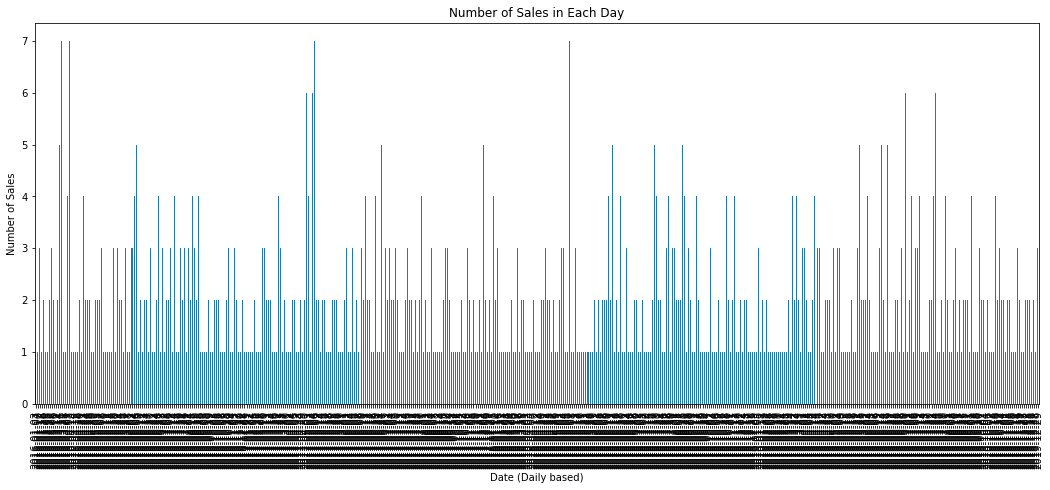

In [26]:
# Daily sales
D_sales = df.index.to_period('D')
D_sales.value_counts().sort_index().plot.bar(figsize=(18, 7))
plt.title("Number of Sales in Each Day")
plt.xlabel("Date (Daily based)")
plt.ylabel("Number of Sales")
plt.show()

From this graph there are no discernible patterns in the daily sales of houses. The highest number of Sales made in a day is 7, there are multiple days where only a single sale was made. Next I will be examining the monthly sales of houses

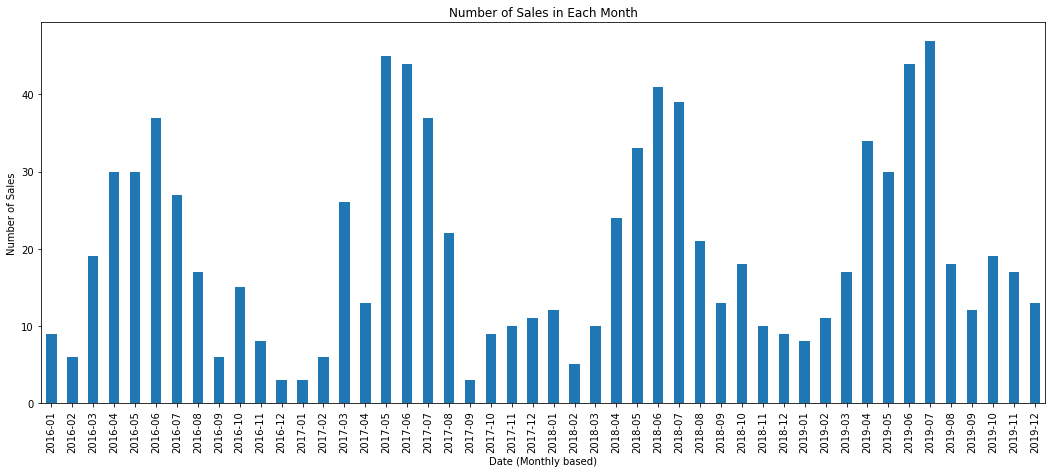

In [27]:
# Monthly sales
M_sales = df.index.to_period('M')
M_sales.value_counts().sort_index().plot.bar(figsize=(18, 7))
plt.title("Number of Sales in Each Month")
plt.xlabel("Date (Monthly based)")
plt.ylabel("Number of Sales")
plt.show()

The first two months of the year, January and Febuary, consistantely perform poorly in terms of housing sales across the dataframe. 

From 2016-2019 the sales of houses follow a very similar pattern, beginning to climb in March, peaking in the summer months May, June and July, steadily decreasing in volume from these months onwards.

The last five months of the year all perform poorly in comparison to the summer months of each year though they are a marked improvement in comparison to the first two months within a year. They don't have a uniform distribution as each spikes or decreases at random year by year, however, there appears to be a tendency for them to level of from 2018 onwards. By this I mean that there are less discernible drops in monthly sales at the later end of the year, In 2016 and 2017 there was a sharp drop off in sales in September, this isn't shared by the latter two years. The total number of sales made in the final three months 2018-2019 appear to be more balanced, more stable and less prone to fluctuations.


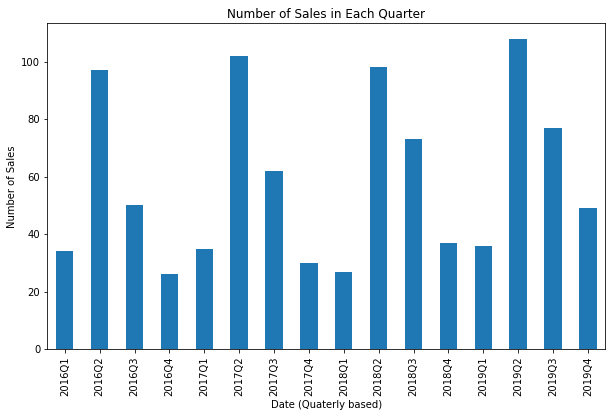

In [28]:
# Quaterly Sales
Q_sales = df.index.to_period('Q')
Q_sales.value_counts().sort_index().plot.bar(figsize=(10, 6))
plt.title("Number of Sales in Each Quarter")
plt.xlabel("Date (Quaterly based)")
plt.ylabel("Number of Sales")
plt.show()

From this graph displaying the total number of quarterly sales it is clear that the first three months of the year are the worst performing in terms of sales. There is no clear growth in this quarter, its quarterly sales fluctuate to a small degree each year.

The second quarter performs the best on a yearly basis, consistently performing better than other quarters. There is no discernible trend in the increase of total sales in this quarter, from year to year. 

The third quarter is consistently the second-best quarter in terms of housing sales. It shows clear signs of growth, rising each year from 2016-2019.

The fourth quarter is only ahead of the first quarter in terms of housing sales, though it has shown a growing trend, increasing consistently from 2017-2019.

#### b) Construct another time series from the data, showing how the overall average monthly sale price of houses is changing over time. Discuss the trends in this series.


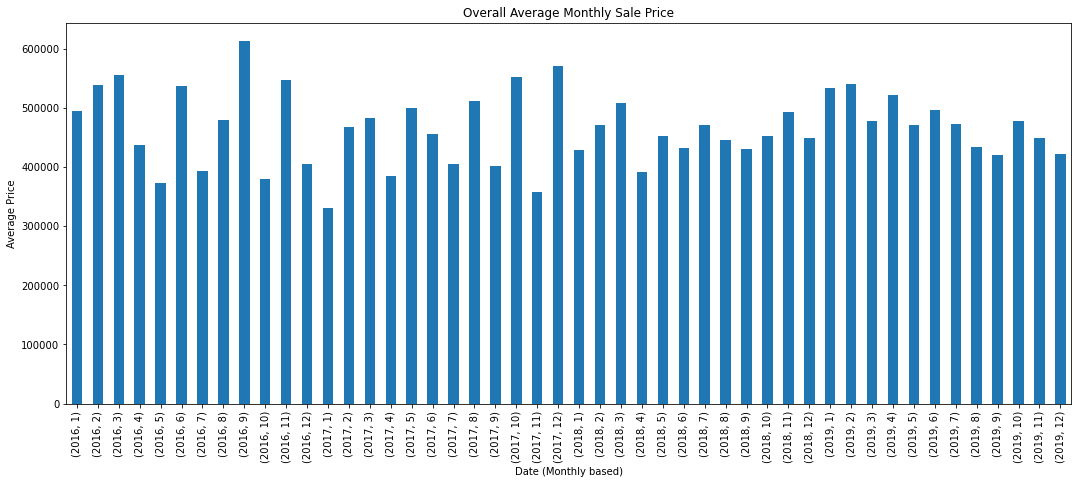

In [29]:
df.groupby(['year','month'])['Price'].mean().plot.bar(figsize=(18, 7))
plt.title("Overall Average Monthly Sale Price")
plt.xlabel("Date (Monthly based)")
plt.ylabel("Average Price")
plt.show()

In 2016, houses sold in December sold for on average 600,000 euro, the highest monthly average price in this data frame. In January of 2017, houses sold for slightly more than 300,000 euro, making it the lowest monthly average price in this data frame. 
 
The four months with the highest average price are all within the first two years of this timeframe, September 2016, December 2017, March 2016 and October 2017. The four months with the lowest average sales price can also be found within the first two years, January 2017, May 2016, November 2017, and October 2016. 

There were large fluctuations in the average monthly sale price from 2016-17, with both these years spiking and dropping in average monthly sale price, month by month. This ceased in 2018-2019 where the average sale price for a house appears to have stabilised and become much more uniform. Though there are minor fluctuations each month the average sales prices diverge very little in comparison to the first two years.

#### c) For each unique location in the data, construct a separate time series representing the average monthly price of houses sold in that location. Compare and discuss the differences between the trends across the locations.

In [30]:
df.Location.unique()

array(['Brookville', 'West End', 'Oakbrook', 'Rivermont', 'Beacon Hill',
       'East End', 'Avoca'], dtype=object)

In [31]:
df.groupby(['year','month','Location'])['Price'].mean()

year  month  Location   
2016  1      Brookville     630210.666667
             Oakbrook       381813.000000
             West End       448383.250000
      2      Brookville     571187.333333
             West End       507823.666667
                                ...      
2019  11     Rivermont      313467.333333
      12     Beacon Hill    712152.000000
             Oakbrook       410983.000000
             Rivermont      252513.800000
             West End       478463.800000
Name: Price, Length: 235, dtype: float64

In [32]:
Brookville_df = df[df['Location'] == 'Brookville']
WestEnd_df = df[df['Location'] == 'West End']
Oakbrook_df = df[df['Location'] == 'Oakbrook']
Rivermont_df = df[df['Location'] == 'Rivermont']
BeaconHill_df = df[df['Location'] == 'Beacon Hill']
EastEnd_df = df[df['Location'] == 'East End']
Avoca_df = df[df['Location'] == 'Avoca']

I will now examine the overall Monthly Sale price for location in the Dataframe. 

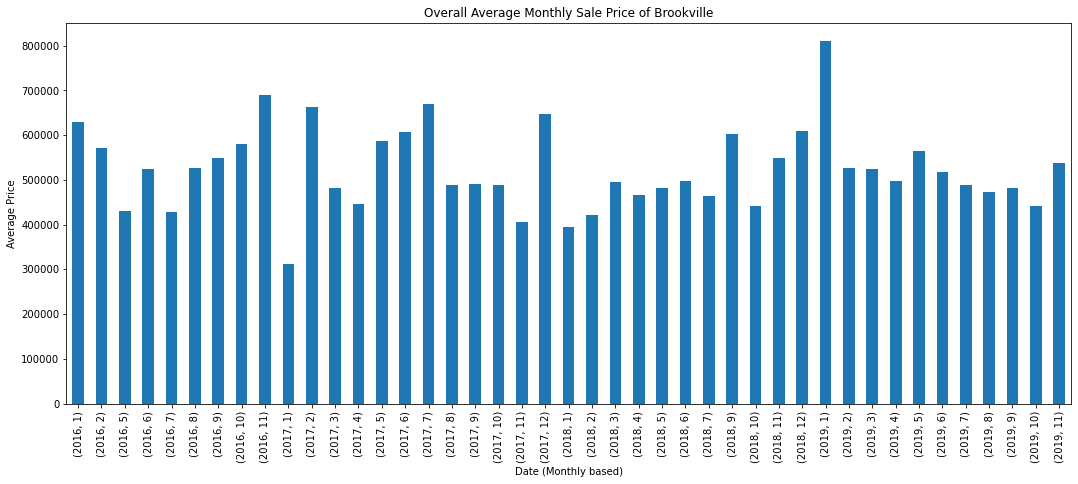

In [33]:
Brookville_df.groupby(['year','month'])['Price'].mean().plot.bar(figsize=(18, 7))
plt.title("Overall Average Monthly Sale Price of Brookville")
plt.xlabel("Date (Monthly based)")
plt.ylabel("Average Price")
plt.show()

For the Location Brookville the lowest average monthly sale price of 300,000 euro occurred in January 2017 which is unsurprising given that this time period had the lowest average monthly sales within the data frame. The highest average monthly sale price of 800,000 euro occurred on January 2019.

In 2016 the average monthly sale price in Brookville rose and fell rapidly, rising to 700,000 euro in October and falling to 300,000 euro the following month in November. In 2017 the average price in February was 700,000 euro, an increase of over 400,000 euro from the previous month. 

The average monthly sale prices began to stabilise in 2018, no longer rising and plummeting as severely as they in the prior two years. In 2019 apart from January, where the average house price reached 800,000 euro, the average monthly sale price was maintained between 500,000 - 600,000 euro.


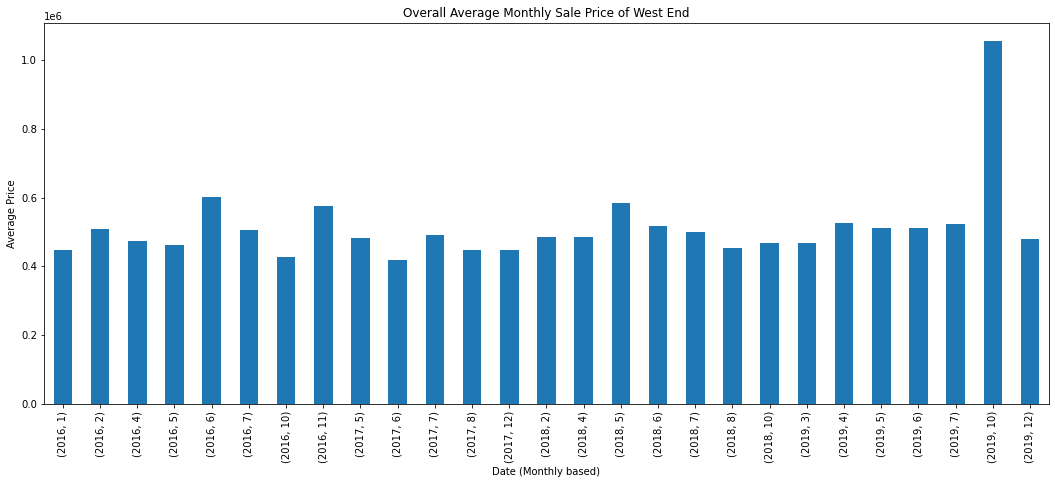

In [34]:
WestEnd_df.groupby(['year','month'])['Price'].mean().plot.bar(figsize=(18, 7))
plt.title("Overall Average Monthly Sale Price of West End")
plt.xlabel("Date (Monthly based)")
plt.ylabel("Average Price")
plt.show()

The average monthly sale price of property located in West End remained stable throughout the data set. From 2016-2019 the 
average monthly sale price fell between 400,000 - 600,000 euro. With a singular exception in October 2019 where the average 
monthly sales price was 1,000,000 euro, a price double that of the average West End home.

Contrary to Brookville a Location where property prices fluctuated, West End property maintained its original property prices 
throughout the data set.


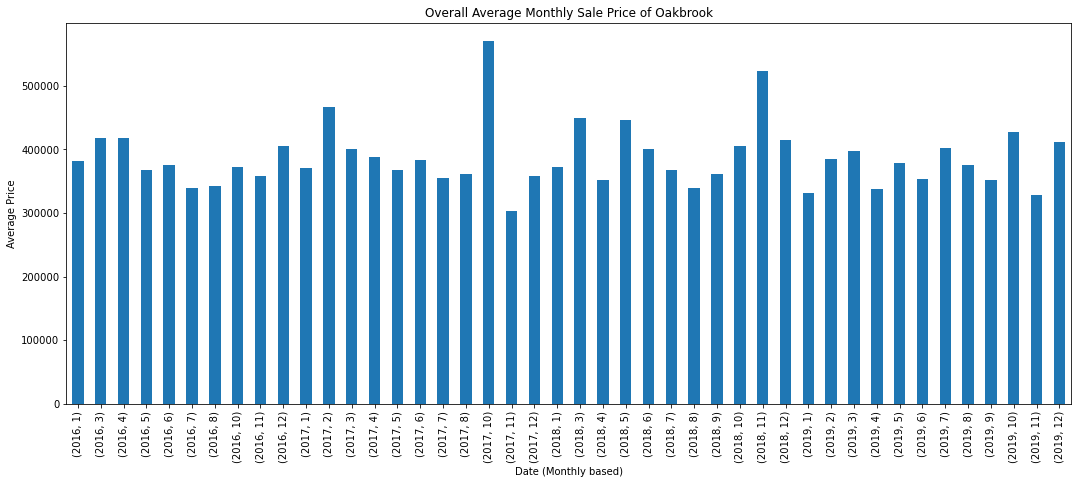

In [35]:
Oakbrook_df.groupby(['year','month'])['Price'].mean().plot.bar(figsize=(18, 7))
plt.title("Overall Average Monthly Sale Price of Oakbrook")
plt.xlabel("Date (Monthly based)")
plt.ylabel("Average Price")
plt.show()

Oakbrook property prices remained consistently at 350,000 to 450,000 throughout the database, though some months experienced
a large increase in the average monthly sale price, such as October 2017 and November 2018 where prices rose above 500,000
on a whole the property values were consistent throughout the database.

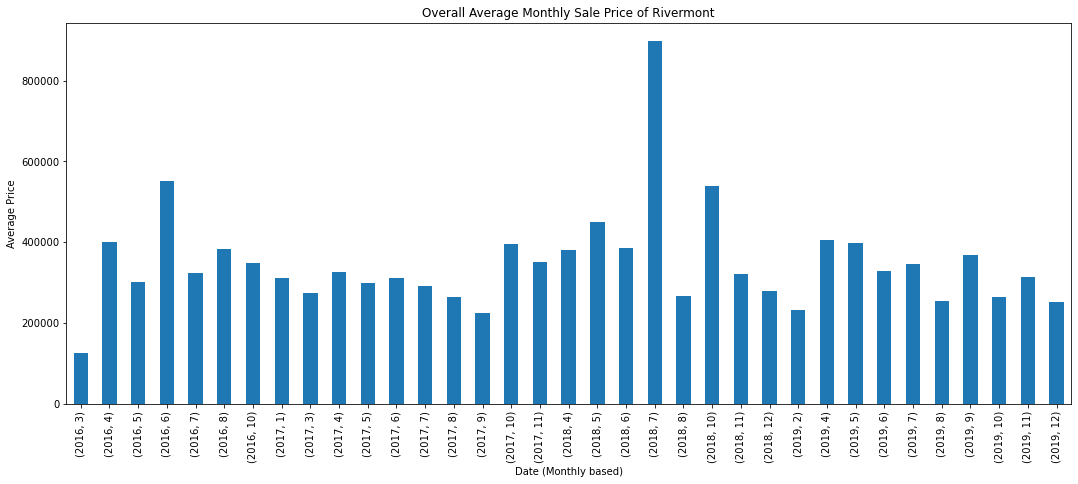

In [36]:
Rivermont_df.groupby(['year','month'])['Price'].mean().plot.bar(figsize=(18, 7))
plt.title("Overall Average Monthly Sale Price of Rivermont")
plt.xlabel("Date (Monthly based)")
plt.ylabel("Average Price")
plt.show()

In Rivermont the average house appeared to sell for somewhere between 300,000 - 400,000 euro though there were a few notable
exceptions to this. In March 2016 the average house price was close to 100,000 euro, the following month in June prices rose
to close to 600,000 on average. The most expensive property in 2018 was purchased in July 2018 and was sold for more then
900,000 euro, which is an anomaly in this data set. 

There was no unique trend in this location, the average monthly sale price remained relatively consistent throughout the dataset.

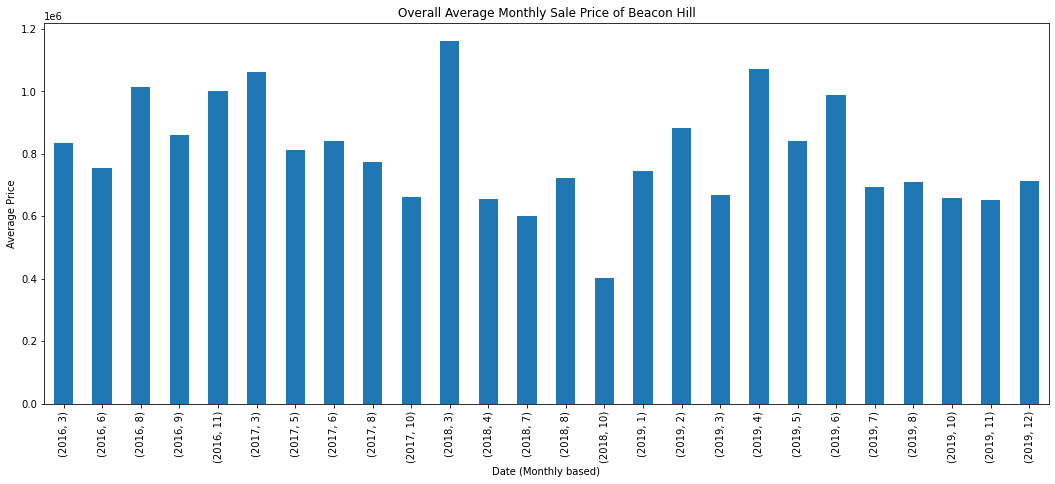

In [37]:
BeaconHill_df.groupby(['year','month'])['Price'].mean().plot.bar(figsize=(18, 7))
plt.title("Overall Average Monthly Sale Price of Beacon Hill")
plt.xlabel("Date (Monthly based)")
plt.ylabel("Average Price")
plt.show()

The house prices for Beacon Hill on were on average above or equal to 800,000 euro through 2016 and 2017, though 
few houses were bought that year. In March of 2018 a house was sold for just under 1.2 million euros in Beacon Hill,
after this all-other houses sold in 2018 were sold for less than 800,000 euros, falling as low as 400,000 euro in October 2018. It is worth noting that this data frame doesn't contain many records of purchases from this location, making the data more influenced by large or small purchased house prices. 

House prices showed a decreasing trend in 2018 though they began to rise again in 2019. Most houses in this dataset sold for prices between 600,000 to 800,000 euro, though some house prices significantly exceeded this. The last four months in 2019 offer a realtively uniform distribution of average property prices, though overall the monthly sale price for houses in Beacon Hill fluctuated throughout the dataframe.


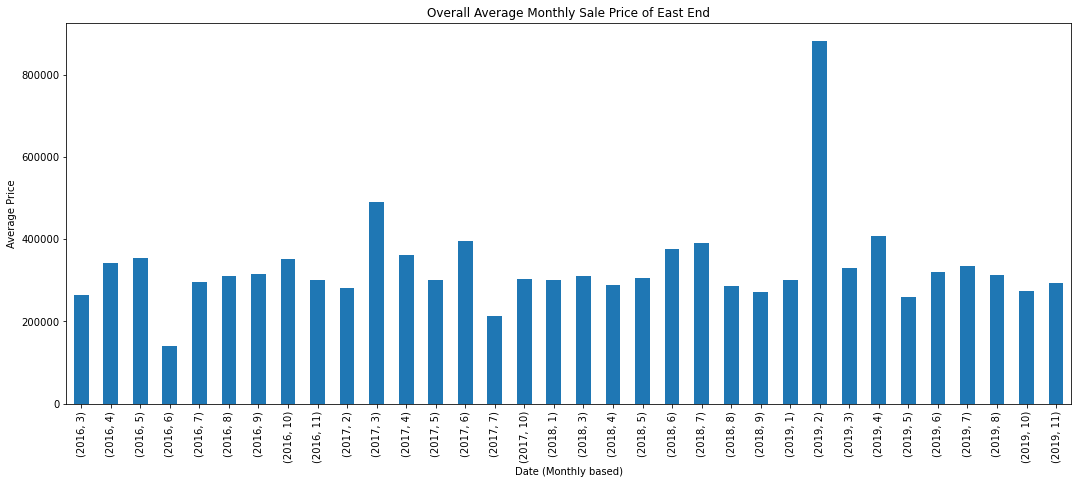

In [38]:
EastEnd_df.groupby(['year','month'])['Price'].mean().plot.bar(figsize=(18, 7))
plt.title("Overall Average Monthly Sale Price of East End")
plt.xlabel("Date (Monthly based)")
plt.ylabel("Average Price")
plt.show()

The average monthly sales of Houses in East End remain stable throughout the data frame selling for between 200,000 and 400,000, average prices did spike on February 2019 where houses were sold for an average of 800.000 euro. Though small categories of data like this are more easily influenced by singular abnormal results. The pricing of Housing in this area remained stable throughout the data frame.

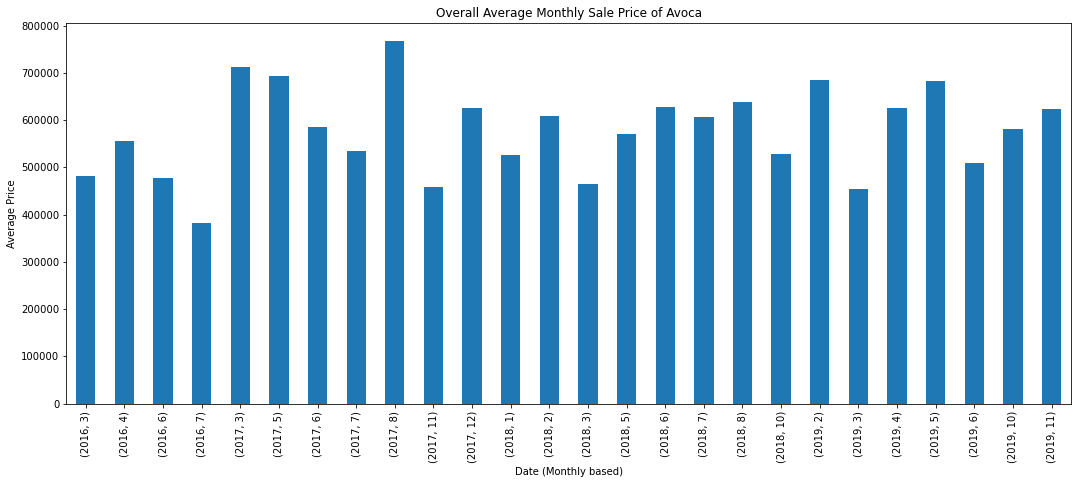

In [39]:
Avoca_df.groupby(['year','month'])['Price'].mean().plot.bar(figsize=(18, 7))
plt.title("Overall Average Monthly Sale Price of Avoca")
plt.xlabel("Date (Monthly based)")
plt.ylabel("Average Price")
plt.show()

In this Location House prices Fluctuate throughout the data frame, making it difficult to understand the standard price of a house at this location. In the first Four entries in 2016 price range for a house in this location would appear to be 400,000 to 550,000 euro. The next year's price range increased from 500,000 euro to close to 800,000 euro. House prices in 2018-2019 maintained this price range. There is a large difference between the price of an average house bought in 2016 in comparison to any other year. Apart from this the years 2017-2019 remained relatively stable housing prices though there is clearly a large difference in housing prices at this location. 

Brookville and Oakbrook are the locations with the greatest number of months in terms of sales. Apart from Brookville, Beacon Hill and Avoca which show slightly different trends, most locations have similar patterns and aren't unique or divergent. House prices tend to remain relatively stationary over the time period examined in the data set, though outliers do occur.

From the time series analysis, it is clear to me that not all houses in the same location belong to same price range. A houses price can be influenced by its size, style, facilities, the state of the economy, recent refurbishment, its age etc. It isn't unusual for an outlier or multiple outliers to emerge in data about the sale of houses for these reasons.


## Correlation & Regression

#### a) Analyse how house sale prices correlate with the other numeric features in the data.


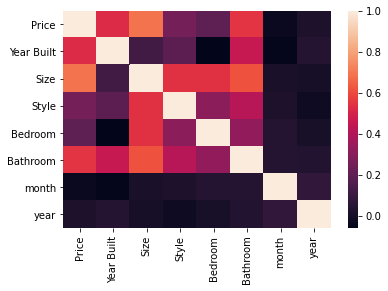

In [40]:
sb.heatmap(df.corr())
plt.show()

I have tested for Correlation between a houses sale price and other numeric features within the data using a Heatmap. For features that appear to have good correlation values I will get the aproximate correlation value. 

In [41]:
df['Price'].corr(df['Size'])


0.688122077410247

In [42]:
df['Price'].corr(df['Bathroom'])

0.5513453788451971

In [43]:
df['Price'].corr(df['Year Built'])

0.5260271696649785

House sale price has a good correlation with Size, with 68.8%. The other tested numeric features such as the year it was built, and the number of Bathrooms have average correlation scores of 52% and 55% respectively. Based on the Heatmap the other numeric features are not worth testing as they have bad correlation scores.

#### b) Analyse how house sale prices relate to each of the categorical features in the data.


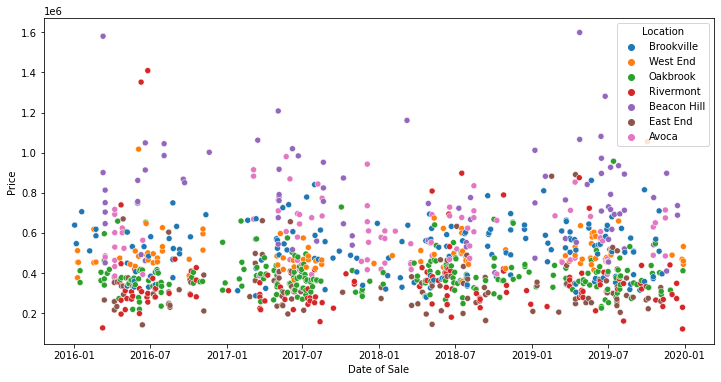

In [44]:
plt.figure(figsize=(12,6))
sb.scatterplot(data=df, x=df.index, y='Price', hue='Location')
plt.show()

In [45]:
encoder=LabelEncoder()
encoder.fit(df['Location'])
df['Location_enc']=encoder.transform(df['Location'])
df['Price'].corr(df['Location_enc'])

-0.4114227855519246

From the scatterplot diagram above it is clear that there is negative correlation between a houses Price and its Location.

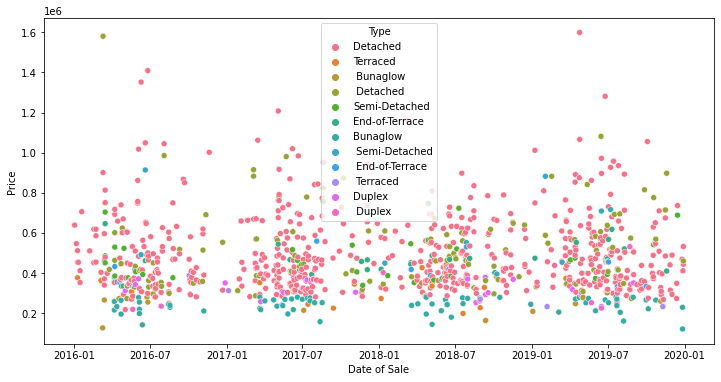

In [46]:
plt.figure(figsize=(12,6))
sb.scatterplot(data=df, x=df.index, y='Price', hue='Type')
plt.show()

In [47]:
encoder.fit(df['Type'])
df['Type_enc']=encoder.transform(df['Type'])
df['Price'].corr(df['Type_enc'])

-0.007738530295585309

From the above scatterplot Diagram there is a negative correlation between house Price and house Type.

In [48]:
df.head()

,Price,Location,Year Built,Size,Type,Style,Bedroom,Bathroom,month,year,Location_enc,Type_enc
Date of Sale,,,,,,,,,,,,
2016-01-03,638740,Brookville,2011,1849,Detached,2.0,3,2,1,2016,2,7
2016-01-07,546330,Brookville,2009,1551,Detached,1.0,3,2,1,2016,2,7
2016-01-10,376039,West End,1963,1073,Terraced,1.0,3,1,1,2016,6,11
2016-01-10,511164,West End,2007,1628,Detached,2.0,3,2,1,2016,6,7
2016-01-10,453222,West End,2013,1388,Detached,2.0,3,2,1,2016,6,7


#### c) Investigate the use of simple linear regression to predict house sale prices, based on each of the individual numeric features in the data. Which numeric feature appears to be most useful when predicting prices?


In [49]:
X = df.drop(['Price','Location_enc','Type_enc','Location','Type'], axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [50]:
X.columns

Index(['Year Built', 'Size', 'Style', 'Bedroom', 'Bathroom', 'month', 'year'], dtype='object')

Feature: 0, Score: 94315.58574
Feature: 1, Score: 167739.57310
Feature: 2, Score: -47426.32781
Feature: 3, Score: -26835.82101
Feature: 4, Score: -9080.88977
Feature: 5, Score: -361.84351
Feature: 6, Score: 1241.15590


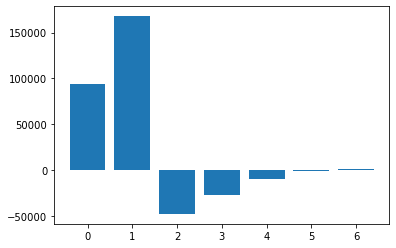

In [51]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

A houses size appears to be the most useful indicator/factor in predicting a houses price followed by the year in which it was built. Other factors such as it's style, Bedrooms, Bathrooms etc are largely irrelevant.


R2 score (i.e accuracy) of prediction 

In [52]:
r2_score = model.score(X_test_scaled,y_test)
r2_score

0.6856920748050686

The above model has approx 69% accuracy when predicting house prices.

## Classification

#### a) The price of a property is often said to be linked closely to its location, while different areas will have different types of housing stock. Investigate whether it is possible to classify the location of a house, based on the other descriptive features in the house sale dataset. You can use any classification algorithm of your choice. You should evaluate the performance of the classifier using an appropriate strategy.

In [53]:
X = df.drop(['Location','Location_enc','Type_enc'], axis=1)
y = df['Location'].values

Since the dataset contains character variables I will need to encode it using LabelEncoder before using XGBClassifier. 

As mentioned at the start of this project, before using XGBClassifier you must have XGBoost installed. This can be completed by opening Annaconda command prompt and entering the command,   pip install xgboost

It should take thirty seconds or less to finish installing. 

In [54]:
le = LabelEncoder()
X['Type'] = le.fit_transform(X['Type'])
y = le.fit_transform(y)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [56]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [57]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [58]:
# Predicting the Test set results
y_pred = model.predict(X_test)
# Making the Confusion Matrix
ac = accuracy_score(y_test,y_pred)
ac

0.6949152542372882

The accuracy of the classifier model is approx. 70%, this is a relatively good model score and shows the relationship between a properties price and its location.

XGBoost is an open source and efficient implementation of the gradient boosted trees algorithm, gradient boosting is a supervised learning algorithm that attempts to predict a target variable by combining the estimates of a set of simpler and weaker models. The reason that I used XGBoost for this project is because it is one of the best machine libraries for regression and classification problems and it can be used for multiclass classification.



#### b) Experiment with applying the same classifier in combination with different subsets of descriptive features. Which feature(s) appear to be be most useful for classification?

Feature: 0, Score: 0.11083
Feature: 1, Score: 0.27404
Feature: 2, Score: 0.06783
Feature: 3, Score: 0.11690
Feature: 4, Score: 0.14208
Feature: 5, Score: 0.08856
Feature: 6, Score: 0.11708
Feature: 7, Score: 0.03971
Feature: 8, Score: 0.04297


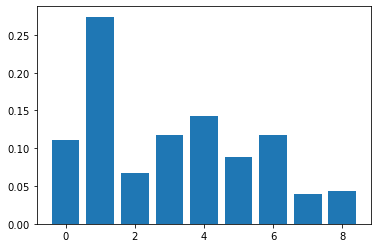

In [59]:
# feature importance for classification
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Useful features score, this will be used to determine which features should be used in combination with the same classifier. 

Year built has the highest feature importance score i.e. 0.27 while predicting the Location.

In [60]:
X.columns

Index(['Price', 'Year Built', 'Size', 'Type', 'Style', 'Bedroom', 'Bathroom',
       'month', 'year'],
      dtype='object')

In [61]:
X = X.drop(['Size','Bedroom','month','year'], axis=1)
#Remove Size, Bedroom, Month and Year

In [62]:
X.columns

Index(['Price', 'Year Built', 'Type', 'Style', 'Bathroom'], dtype='object')

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = XGBClassifier()
model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = model.predict(X_test)
# Making the Confusion Matrix
ac = accuracy_score(y_test,y_pred)
ac

0.652542372881356

The accuracy score of 65% means that this is a poorly performing model and is comparatively less effective then the previous model used.